In [21]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from tqdm import tqdm

# Import données

Dimension de X : (100, 2)
Dimension de Y : (100, 1)


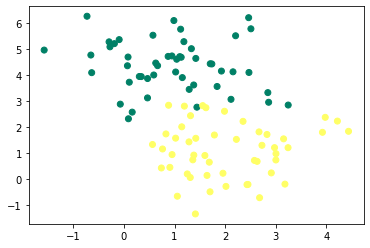

In [2]:
# Random_state = 0 pour ne pas que le dataset change lorsqu'on rapelle la fonction
X, Y = make_blobs(n_samples = 100, n_features = 2, centers=2, random_state = 0)

# Y passe en vecteur colonne
Y = Y.reshape((Y.shape[0], 1))

print(f'Dimension de X : {X.shape}')
print(f'Dimension de Y : {Y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="summer")

# Classe neuronne

Un neurone a été initialisé !


100%|██████████| 10000/10000 [00:01<00:00, 7551.82it/s]


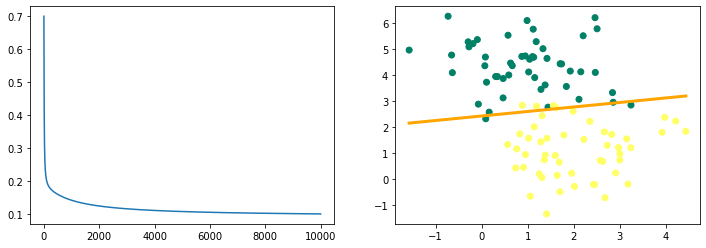

(array([[ 0.61111915],
       [-3.53613357]]), array([8.59033591]))


In [32]:
class Neuron():
    ''' Création et entraînement d'un neurone'''
    def __init__(self, X, Y):
        # Chargement du dataset
        self.X = X
        self.Y = Y

        # Initialisation des vecteurs paramètres
        self.W = np.random.randn(X.shape[1], 1)
        self.b = np.random.randn(1)      

        print('Un neurone a été initialisé avec succès !')
        
    def forwardPropagate(self, debug=False):
        ''' Calcul du vecteur colonne probabilités'''
        if debug:
            print(f'Taille X : {self.X.shape}')
            print(f'Taille W : {self.W.shape}')

        Z = (self.X).dot(self.W) + self.b
        self.A = 1 / (1+ np.exp(-Z))
        
    def error_function(self):
        ''' Foncion coût '''
        eps = 1e-15 # Pour éviter d'avoir log 0
        
        self.error = 1/len(self.Y) * np.sum(-self.Y * np.log(self.A + eps) - (1 - self.Y) * np.log(1-self.A + eps))
    
    def backPropagate(self):
        ''' Backpropagation'''
        self.dW = 1/len(self.Y) * np.dot(self.X.T, self.A - self.Y)
        self.db = 1/len(self.Y) * np.sum(self.A - self.Y)

    def update(self, learning_rate):
        ''' Forward propagation'''
        self.W = self.W - learning_rate * self.dW
        self.b = self.b - learning_rate * self.db

    def trainNeuron(self, N_iter, learning_rate):
        Loss = [] # Historique des coûts

        for i in tqdm(range(N_iter)):
            n.forwardPropagate()
            
            n.error_function()
            Loss.append(n.error) # Historique des coûts
            
            n.backPropagate()
            n.update(learning_rate)


        # Affichage                    
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)        
        
        plt.plot(Loss)

        plt.subplot(1, 2, 2)
        x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100) # x0 fixés
        x1 = (-self.W[0] * x0 - self.b) / self.W[1] # A = 0.5 <=> w0.x0 + w1.x1 + b = 0
        plt.scatter(self.X[:,0], self.X[:,1], c=self.Y, cmap="summer") # Affichage des valeurs des 2 variables (X[:, 0] et X[:, 1]) pour les 100 échantillons
        plt.plot(x0, x1, c='orange', lw=3)

        plt.show()

        return self.W, self.b

n = Neuron(X, Y) # Création d'un objet neuronne
print(n.trainNeuron(N_iter = 10000, learning_rate=0.1))



